# <font color=blue>OPTIM/OPTECH Laboratory Learning Session II: </font>
## <font color=blue>MIP OPTIMIZATION AND LINEARIZATION</font>

### `MASTEAM`: Master's degree in Applied Telecommunications and Engineering Management
### `MATT`: Master's degree in Advanced Telecommunication Technologies
### `CoDaS`: Erasmus Mundus master's degree in Communications, Engineering and Data Science

###  <font color=#922B21>Castelldefels School of Telecommunications and Aerospace Engineering (EETAC)</font>

**<font color=teal>Cristina Cervelló-Pastor (cristina.cervello@upc.edu)</font>**

## <font color=blue><b>BASIS THEOREM</b></font>


Consider a function defined in a domain $D\subseteq\mathbb{R}^n$ that has a maximum value M inside this domain. The following theorem holds:


$\boxed{\begin{aligned}
&\mbox{Let } D\subseteq\mathbb{R}^n \mbox{and } f:D \rightarrow \mathbb{R} \mbox{, and let M be a nonzero real number such that }\\
& M\geq \text{max} \{f(x)|x\in D\}. \\
&\mbox{Then, for each } \delta \in\{0,1\} \mbox{ and each } \mathbf{x}\in D \mbox{ the following assertions (i) and (ii) are } \underline{equivalent}:\\
\\
&\mbox{(i) if } \delta =0 \mbox{ then } f(\mathbf{x}) \leq 0 \qquad   (i.e. \delta =0 \Rightarrow f(\mathbf{x}) \leq 0)\\
\\
&\mbox{(ii) } f(\mathbf{x}) - M\delta \leq 0.
\end{aligned}}$

Thus, we can substitute the implication (non-linearity) for the inequality constraint.

## <font color=green><b> REVISITING THE FACILITY LOCATION PROBLEM WITH NON-LINEARITIES</b></font>

<b>Sensor Location Problem</b>

<font color=blue><b>USE CASE:</b></font>  determine the location of a limited number of trafﬁc sensors on a highway network so as to obtain the best possible traffic data for the entire network. Thus, we wish to select the $p$ locations for the Weigh-In-Motion (WIM) sensors so as to achieve maximum diversity in the collected data for the entire network.


### <font color=purple>Python functions to create  and plot the scenario</font>

In [57]:
import random
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [58]:
!pip install Pyomo
!apt-get install -y -qq glpk-utils

In [59]:
######################################
# Function to locate points randomly #
######################################

def Locate(w, h, number):
    points_set = []
    for i in range(number):
        coords = [random.uniform(0,w-1), \
                  random.uniform(0,h-1)]
        points_set.append(coords)
    return points_set


##########################################################
# Function to calculate the distance between two sensors #
##########################################################

def Distance(p1, p2):
    return round(math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2),2)


##########################################################
# Function to plot WIM sensors Locations on a w x h area #
##########################################################

# Plot WIM sensors Locations on a w x h area

def PlotArea(w,h,SensorsLocation, which, init):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.tick_params(axis = 'both',  labelsize = 8)
    ax.set_xticks(np.arange(0, w+1, 1))
    ax.set_yticks(np.arange(0, h+1, 1))

    ax.grid(visible=True, which='major',linewidth=1, color='gray', linestyle='--', alpha=0.7)

    ax.set_xlim([0,w])
    ax.set_ylim([0,h])

    if which==[]:
        if init: color='blue'
        else: color='#ADD8E6'
        FL = plt.scatter(*zip(*SensorsLocation),c=color, s=20)
        listnum = list(range(1,len(SensorsLocation)+1))
        for i in [i+1 for i,x in enumerate(SensorsLocation)]:
            ax.annotate(str(i),(SensorsLocation[i-1][0]+0.02,SensorsLocation[i-1][1]+0.02),color=color,fontsize=10)
    else:
        color='#ADD8E6'
        FL = plt.scatter(*zip(*SensorsLocation),c=color, s=20)
        listnum = list(range(1,len(SensorsLocation)+1))
        for i in [i+1 for i,x in enumerate(SensorsLocation)]:
            ax.annotate(str(i),(SensorsLocation[i-1][0]+0.02,SensorsLocation[i-1][1]+0.02),color=color,fontsize=10)
        color='blue'
        FL = plt.scatter(*zip(*which),c=color, s=20)

        for k in [SensorsLocation.index(x)+1 for x in which]:
            ax.annotate(str(k),(SensorsLocation[k-1][0]+0.02,SensorsLocation[k-1][1]+0.02),color=color,fontsize=10)





    plt.title('Potential Sensors Location')

    plt.show()

### SCENARIO

In [60]:
# Define the area
w, h = 10, 10   # Km

# Locate the sensors
NumSensorsLoc = 10
SensorsLocation = Locate(w, h, NumSensorsLoc)

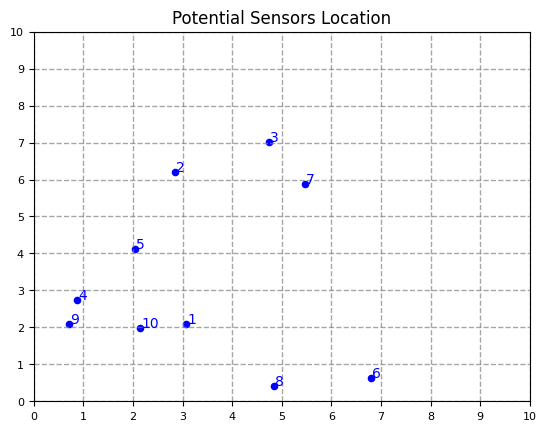

In [61]:
# Plot the area
PlotArea(w,h,SensorsLocation,[],1)

In [62]:
# Compute distances between sensors
DistSensors = {}
for i in range(1,NumSensorsLoc+1):
    for j in range(i+1,NumSensorsLoc+1):
        DistSensors[(i,j)]= Distance(SensorsLocation[i-1], \
                                   SensorsLocation[j-1])

<font color=blue><b>SENSOR LOCATION PROBLEM</b></font>

In the first solution we consider the problem of establishing $p$ sensors at some $n$ predefined locations so that the minimum separation distance between any pair of <b>selected</b> sensors is maximized. This is call the p-dispersion problem. Sensors should be as far away from the closest other sensors as possible.

The basic constraints are:

<ul>
<li> The number of sensors located has to be equal to p.
<li> The minimum distance between any pair of located sensors has to be maximized.
</ul>


#### Parameters: ####

$J$ Set of potential location of sensors
<br /> <br />
$d_{j_1j_2}$ distance from sensor $j_1$ to sensor $j_2$
<br /> <br />  
$M$ a large constant, which is the maximum possible value of D (minimum separation distance between any pair of sensors) in our scenario
<br /> <br />  

#### Variables: ####
$x_{j}$ binary variable, $x_{j}=1$ if sensor $j$ is located, 0 otherwise
<br /> <br />
$D$ minimum separation distance between any pair of sensors
<br /> <br />
\begin{alignat*}{3}
&\\
\mbox{maximize } &\ \ D  &&\\
\mbox{subject to: }&\ \  \sum_{\forall j\in J} x_j = p\quad&&  &&\nonumber\\
&\ \mbox{if }  x_{j1}=1 \textbf{ AND }x_{j2}=1 \Rightarrow d_{j_1j_2} \geq D\quad&&  \forall j_1, j_2 \in J\ \   |\ \ j_1 < j_2 &&\nonumber\\
&\ \  x_j\mbox{binary} \quad  \forall j\in J.&&\nonumber
\end{alignat*}

<br /> <br />
The second constraint is <b>non-linear</b>:
<ul>
<li><b>Non-linear constraint:</b> Considering two sensors, $j1$ and $j2$, if both are located then the distance between them has to be greater than D.

if $x_{j1}=1$ $\textbf{ AND }$ $x_{j2}=1$ $\Rightarrow$ $d_{j_1j_2}\geq D$ $\qquad \forall j_1, j_2 \in J\ \  \text{ such that } \ j1 < j2 $
</ul>
<br>

### LINEARIZATION PROCEDURE


### <font color=green><b>CONSTRAINT</b></font>

To linearize the non-linear constraint:


if $x_{j1}=1$ $\textbf{ AND }$ $x_{j2}=1$ $\Rightarrow$ $d_{j_1j_2}\geq D$ $\qquad \forall j_1, j_2 \in J\ \  \text{ such that } \ j1 < j2 $


which is the same of:

if $x_{j1}+x_{j2}=2$ $\Rightarrow$ $d_{j_1j_2}\geq D$ $\qquad \forall j_1, j_2 \in J\ \  \text{ such that } \ j1 < j2 $

Thus:

if $(2-x_{j1}-x_{j2})=0$ $\Rightarrow$ $D - d_{j_1j_2}\leq 0$ $\qquad \forall j_1, j_2 \in J\ \  \text{ such that }  \ j1 < j2 $

<b>Applying the basis theorem, this is equivalent to</b>:

$\boxed{\begin{aligned}D - d_{j_1j_2} - M\cdot (2-x_{j1}-x_{j2}) \leq 0\end{aligned}}$$\qquad\forall j_1, j_2 \in J\ \ \text{ such that } \ j1 < j2$

being M the maximum value of $(D - d_{j_1j_2})$ in our scenario (i.e, maximum value of $D$). The constraint now is linear.


### MODEL 1

In [63]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.core import Var

In [64]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()

######################
## MODEL PARAMETERS ##
######################

# Set of potential sensors
model.J = RangeSet(1,NumSensorsLoc)

# Distance between sensors
model.d = Param(model.J, model.J, initialize=DistSensors)

# Number of sensors to locate
model.p = Param(initialize=3)

# Parameter for linearization purposes
model.M = Param(initialize=20)


#####################
## MODEL VARIABLES ##
#####################

# x_{j} = 1 if sensor location j is selected, 0 otherwise
model.x = Var(model.J, within=Binary, initialize=0)

# Minimum distance between any pair of sensors
model.D =  Var(within=NonNegativeReals, initialize=0)


########################
## OBJECTIVE FUNCTION ##
########################

# Maximize the distance between two closest sensors

def Objective_rule(model):
    return model.D

model.Objective = Objective(rule=Objective_rule, sense=maximize)


#################
## CONSTRAINTS ##
#################

'''CONSTRAINT 1'''
# Locate p sensors

def Locatep_rule(model):
    return sum(model.x[j] for j in model.J) == model.p

model.Locatep = Constraint(rule=Locatep_rule)


'''CONSTRAINT 2'''
# D is the minimum distance between any pair of sensors
def mindistance_rule(model, j1, j2):
    if (j1 < j2):
        return model.D - model.d[j1,j2] - model.M * (2-model.x[j1]-model.x[j2]) <=0
    else:
        return Constraint.Skip

model.mindistance = Constraint(model.J, model.J, rule=mindistance_rule)

#### SOLVE THE MODEL AND GET THE RESULTS

In [65]:
# Construct model and pass it to an (external) solver (GLPK)
opt = SolverFactory('glpk', executable = '/usr/bin/glpsol')
instance = model.create_instance()
results = opt.solve(instance)

Min distance between sensors:  6.26
Sensors Located: 3,6,9,



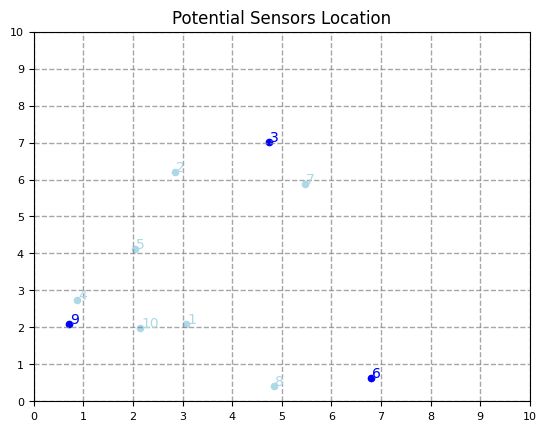

In [66]:
# Print the results
print("Min distance between sensors: ", instance.D.value)
print("Sensors Located: ",end='')

SensorsLocated=[]
for j in range(1, NumSensorsLoc+1):
    if (instance.x[j].value==0): continue
    else:
        print(j, ",",end='', sep="")
        SensorsLocated.append(SensorsLocation[j-1])
print('\n')

PlotArea(w,h,SensorsLocation,SensorsLocated,0)

### <font color=blue><b>EXERCISE 1</b></font>.-
#### Run the p-dispersion problem model and explain the obtained result.

In [67]:
'''The p-dispersion problem returns the location of sensors and the minimimum distance of the sensors(maximized)'''

'The p-dispersion problem returns the location of sensors and the minimimum distance of the sensors(maximized)'

### <font color=blue><b>EXERCISE 2</b></font>.-
#### Consider the following alternative problem. Formulate and solve it. Compare the results with the previous case, for different values of D.

Now we consider a minimum dissimilarity (distance), denoted by a <b>parameter</b> $D$ and we allow a pair of locations to be selected for sensor placement only if their corresponding traffic dissimilarity is at least $D$. Within this threshold, we maximize the number of sensor-locations selected.
<br />
\begin{alignat*}{3}
&\\
\mbox{maximize } &\ \sum_{\forall j\in J} x_j  &&\\
\mbox{subject to: }&\ \  x_{j_1} + x_{j_2} \leq 1&&\qquad \forall j_1, j_2 \in J,\ \ j_1 < j_2\ \  \text{such that }\ \ d_{j_1j_2}<D   &&\nonumber\\
&\ \  x_j\mbox{binary} &&\qquad  \forall j\in J.&&\nonumber
\end{alignat*}
<br />
<br />
Now, due to the logical condition ($d_{j_1j_2}<D$) is defined with parameters (instead of variables), the constraint is linear and could be formulated without needing any linearization procedure.

```python
def mindistance_rule(model, j1, j2):
    if (j1 < j2):
        if (model.d[j1,j2] < model.D):
            return 1-model.x[j1]-model.x[j2] >=0
        else:
            return Constraint.Skip
    else:
        return Constraint.Skip
```

In [68]:
from pyomo.environ import *

######################
## CREATE THE MODEL ##
######################

model = AbstractModel()

######################
## MODEL PARAMETERS ##
######################

# Set of potential sensors
model.J = RangeSet(1, NumSensorsLoc)

# Distance (dissimilarity) between sensors
model.d = Param(model.J, model.J, initialize=DistSensors)

# Minimum dissimilarity threshold
model.D = Param(initialize=5)

model.x = Var(model.J, within=Binary, initialize=0)

########################
## OBJECTIVE FUNCTION ##
########################

# Maximize the number of selected sensor locations
def Objective_rule(model):
    return sum(model.x[j] for j in model.J)

model.Objective = Objective(rule=Objective_rule, sense=maximize)

#################
## CONSTRAINTS ##
#################

def mindistance_rule(model, j1, j2):
    if j1 < j2:
        if model.d[j1, j2] < model.D:
            return model.x[j1] + model.x[j2] <= 1
        else:
            return Constraint.Skip
    else:
        return Constraint.Skip

model.mindistance = Constraint(model.J, model.J, rule=mindistance_rule)

In [69]:
opt = SolverFactory('glpk', executable='/usr/bin/glpsol')
instance = model.create_instance()
results = opt.solve(instance)

In [70]:
print("Number of sensors located: ", sum(instance.x[j].value for j in instance.J))
print("Sensors Located: ", end='')
for j in range(1, NumSensorsLoc + 1):
    if instance.x[j].value == 1:
        print(j, ",", sep="", end="")
print('\n')

Number of sensors located:  3.0
Sensors Located: 3,6,9,





1.   For D=0,
Number of sensors located:  10.0
Sensors Located: 1,2,3,4,5,6,7,8,9,10,
2.   For D=1,
Number of sensors located:  9.0
Sensors Located: 1,2,3,4,5,6,7,8,10,
3.   For D=5,
Number of sensors located:  3.0
Sensors Located: 1,4,10,
3.   For D=50,
Number of sensors located:  1.0
Sensors Located: 2,


So, for different values of D, the number of sensor locations vary.

## <font color=green><b> NON-CONVEX feasible area </b></font>

### <font color=blue><b>EXERCISE 3</b></font>.-
#### Consider the non-convex feasible region ABEFG0 of the following figure bounded by straight lines. Such region is considered as made up of the union of the two convex regions ABC0 and DFG0, defined by the following constraints:


| REGION|CONSTRAINTS |
| :- | -------------------------- |
| ABC0 | $\quad$$y\leq 3$ $\quad$ $x + y \leq 4$|
| DFG0 | $y \leq 1$ $\quad$ $x \leq 5$$\quad$|


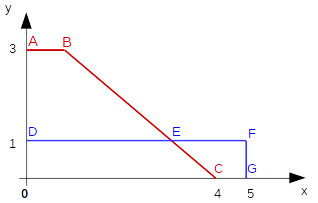

In [71]:
from IPython.display import Image
Image(filename='./NonConvexRegion.png')

#### Determine what constraints do we have to include in a LP to define this region. Test the solution modeling the problem of maximizing the simple function f(x,y)=x+y inside this feasible region
\begin{alignat*}{3}
&\\
\mbox{maximize } &\ \  x + y &&\\
\mbox{subject to: }&\ x, y \in  \mbox{region ABEFG0} &&\nonumber\\
&\ \  x, y\mbox{ real}.&&\nonumber
\end{alignat*}
<br /> <br />
<b>Note</b>: due to x and y take real bounded values, the definition in Pyomo is as follows:

```python
model.x=Var(within=NonNegativeReals, bounds=(0,5), initialize=0)
model.y=Var(within=NonNegativeReals, bounds=(0,3), initialize=0)
```

#### Print the resulting values of your model and explain their meaning


In [72]:
from pyomo.environ import *

# Create the model
model = ConcreteModel()

# Define the continuous variables (x and y)
model.x = Var(within=NonNegativeReals, bounds=(0, 5), initialize=0)
model.y = Var(within=NonNegativeReals, bounds=(0, 3), initialize=0)
model.delta1 = Var(within=Binary, initialize=0)
model.delta2 = Var(within=Binary, initialize=0)

# Objective function: maximize f(x, y) = x + y
def objective_rule(model):
    return model.x + model.y
model.objective = Objective(rule=objective_rule, sense=maximize)

#Constrains---------------------------

#1
def constraint1_rule(model):
    return model.x + model.y <= 8- 4*model.delta1
model.constraint1 = Constraint(rule=constraint1_rule)

#2
def constraint2_rule(model):
    return model.y <= 3 - 2*model.delta2
model.constraint2 = Constraint(rule=constraint2_rule)

#3
def constraint3_rule(model):
    return model.delta1 + model.delta2 >= 1
model.constraint3 = Constraint(rule=constraint3_rule)

# Solve the model
opt = SolverFactory('glpk', executable = '/usr/bin/glpsol')
results = opt.solve(model)

# Print the results
print("Optimal x:", model.x())
print("Optimal y:", model.y())
print("Optimal objective (x + y):", model.x() + model.y())


Optimal x: 5.0
Optimal y: 1.0
Optimal objective (x + y): 6.0
